# DDoS: Security metrics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data source: https://surfdrive.surf.nl/files/index.php/s/CZWfWQp3VKGKa8m
df = pd.read_csv('../data_with_ports.csv.gz', sep='|', compression='gzip')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (15,17,19,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# parse string to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['start_time'] = pd.to_datetime(df['start_time'], format='%Y-%m-%dT%H:%M:%S+09:00')
df['stop_time'] = pd.to_datetime(df['stop_time'], format='%Y-%m-%dT%H:%M:%S+09:00')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5721432 entries, 0 to 5721431
Data columns (total 35 columns):
target_ip                 object
date                      datetime64[ns]
sensor_id                 object
service                   object
start_time                datetime64[ns]
stop_time                 datetime64[ns]
duration                  float64
packets                   int64
raw_country               object
raw_as                    object
raw_hostname              object
udp_port_list             object
pyasn_as                  float64
pyasn_as_bgp_size         float64
cc                        object
region                    object
is_oecd                   float64
as_type                   object
as_type_confidence        float64
tg_op                     object
org                       object
org_range                 object
org_rangesize             float64
org_ipsize_seen           float64
org_domainsize_seen       float64
org_ipsize_seen_shared    float

In [5]:
df.head()

,target_ip,date,sensor_id,service,start_time,stop_time,duration,packets,raw_country,raw_as,...,org_ipsize_seen_shared,org_is_hosting,org_tag,caida_type,dc,subs,as_ipsize_seen,as_domainsize_seen,pps,year
0,1.0.131.184,2014-08-02,sensor001,dns,2014-08-02 22:32:18,2014-08-02 22:37:15,297.0,609,Thailand,AS9737 TOT Public Company Limited,...,591.0,1.0,NaN,Transit/Access,0,1593000.0,405292.0,1408.0,2.050505,2014
1,1.0.131.184,2014-08-02,sensor003,dns,2014-08-02 22:32:20,2014-08-02 22:37:18,298.0,602,Thailand,AS9737 TOT Public Company Limited,...,591.0,1.0,NaN,Transit/Access,0,1593000.0,405292.0,1408.0,2.020134,2014
2,1.1.0.1,2014-07-01,sensor007,chg,2014-07-01 16:20:55,2014-07-01 16:21:24,29.0,494,China,None,...,2315.0,0.0,other,NaN,0,NaN,NaN,NaN,17.034483,2014
3,1.1.1.1,2014-01-10,sensor001,chg,2014-01-10 23:50:48,2014-01-10 23:56:46,358.0,331,Australia,AS15169 Google Inc.,...,6502.0,1.0,NaN,Content,2416,NaN,84522.0,4105765.0,0.924581,2014
4,1.1.1.1,2014-01-11,sensor001,chg,2014-01-11 01:11:09,2014-01-11 01:14:17,188.0,576,Australia,AS15169 Google Inc.,...,6502.0,1.0,NaN,Content,2416,NaN,84522.0,4105765.0,3.063830,2014


## 1. Top N Countries with most incidents

In [6]:
# top N countries with most incidents
N = 5

# list out the top N countries with most incidents
topNcountries = df.cc.value_counts()[:N].index.to_list()

# count the daily incident frequency for each country
df_countries = df[["cc", "date"]].groupby("date").cc.value_counts().to_frame()
df_countries.columns = ["counts"]
df_countries.reset_index(inplace=True)

# filter only the top N countries
df_countries = df_countries[df_countries['cc'].isin(topNcountries)]
df_countries.columns = ["Date", "Country", "# of Incidents per day"]

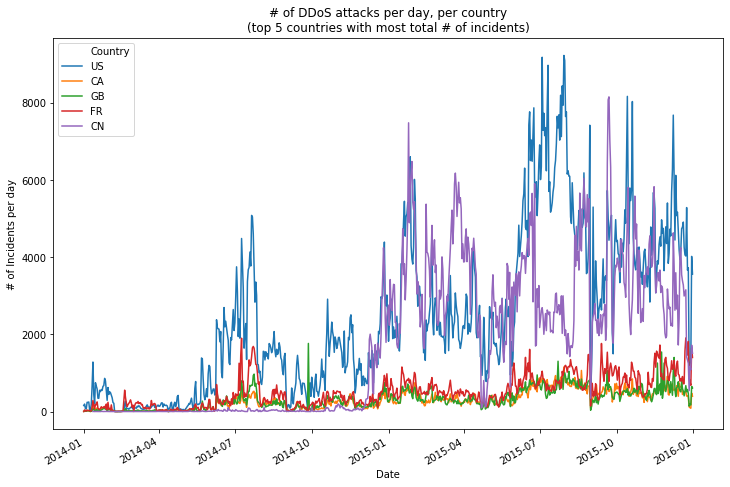

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.lineplot(x="Date", y="# of Incidents per day", hue="Country", data=df_countries)
ax.set_title("# of DDoS attacks per day, per country\n(top %i countries with most total # of incidents)" % N)
fig.autofmt_xdate() # formatting datetime xlabel